<a href="https://colab.research.google.com/github/sanjaymahadeva7/OBB_yolov8/blob/main/Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check for GPU access

In [ ]:
!nvidia-smi

Wed Aug 14 14:38:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


Install YOLOv8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
from IPython.display import display, Image

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


My Data set from RoboFlow

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NYec1CLqRegiupHjFExX")
project = rf.workspace("sanjay-m-7nbqj").project("grey-scientific-labs-qcds1")
version = project.version(1)
dataset = version.download("yolov8-obb")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Grey-Scientific-Labs-1 in yolov8-obb:: 100%|██████████| 784/784 [00:00<00:00, 5622.34it/s]


Training the model

In [ ]:
%cd {HOME}

!yolo task=obb mode=train model=yolov8s-obb.pt data={dataset.location}/data.yaml epochs=35 imgsz=640 batch=8

/content
100% 22.2M/22.2M [00:00<00:00, 40.5MB/s]
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8s-obb.pt, data=/content/datasets/Grey-Scientific-Labs-1/data.yaml, epochs=35, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

/content


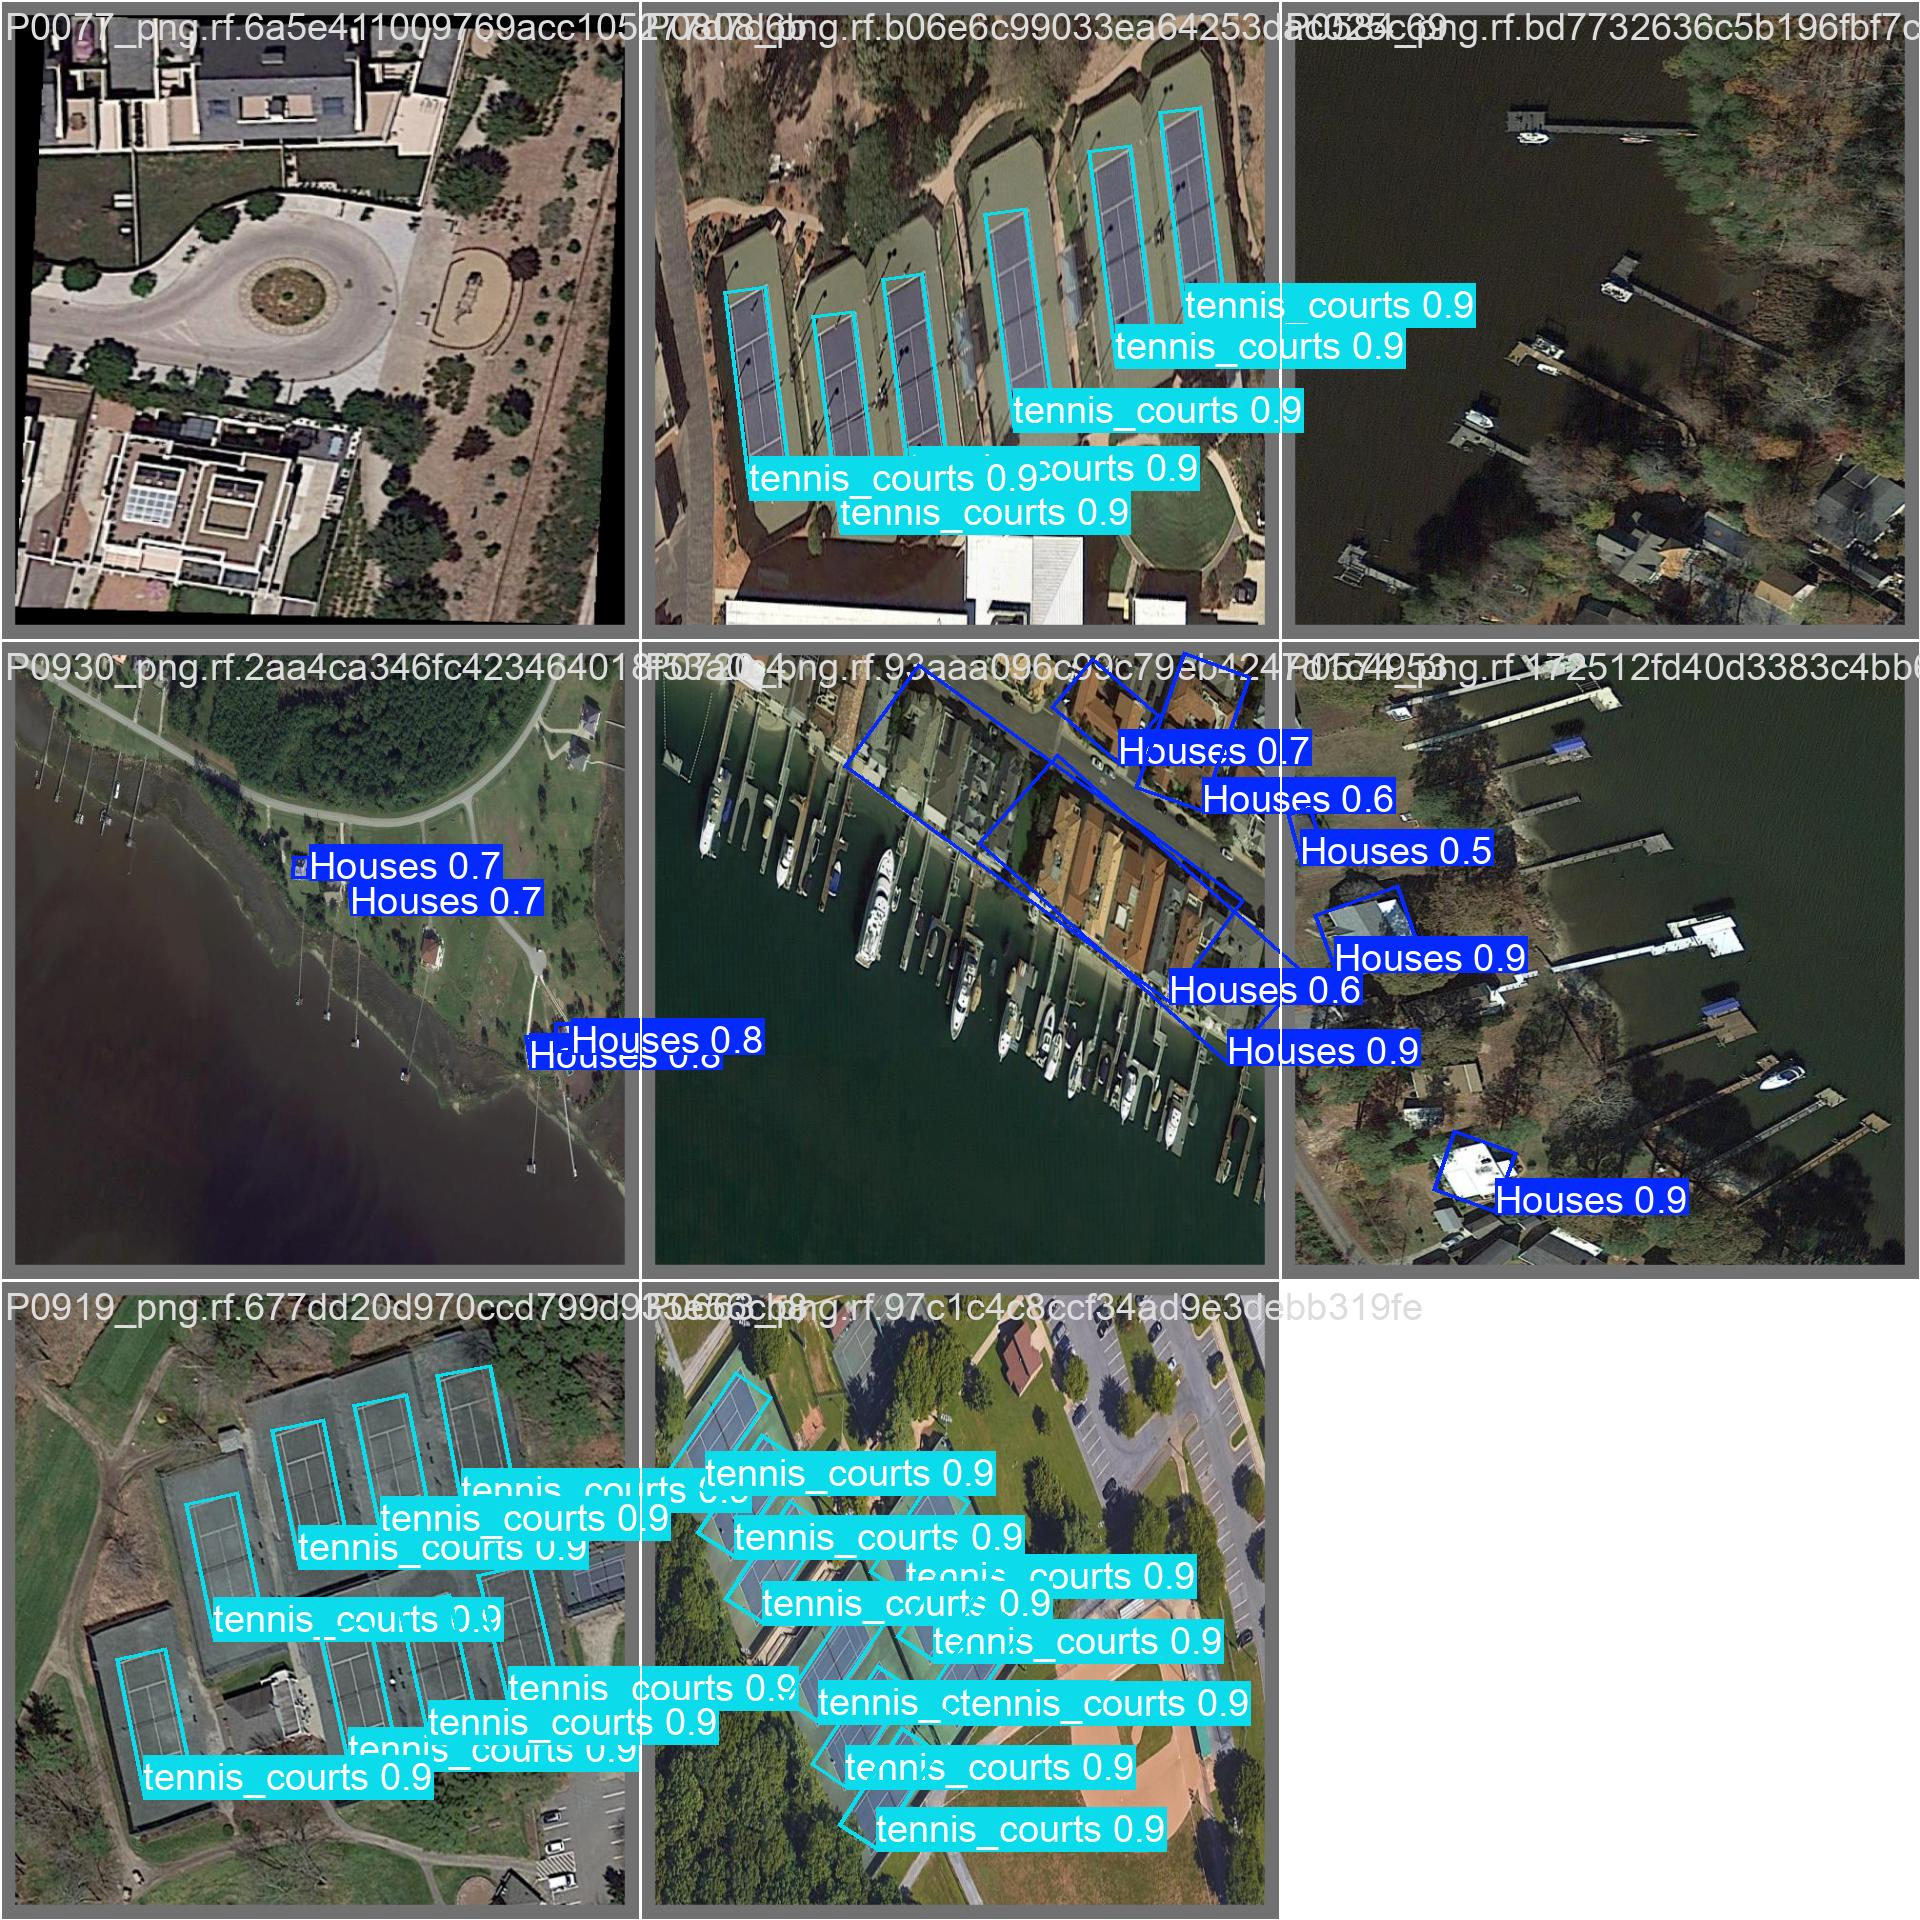

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/obb/train/val_batch0_pred.jpg', width=600)

/content


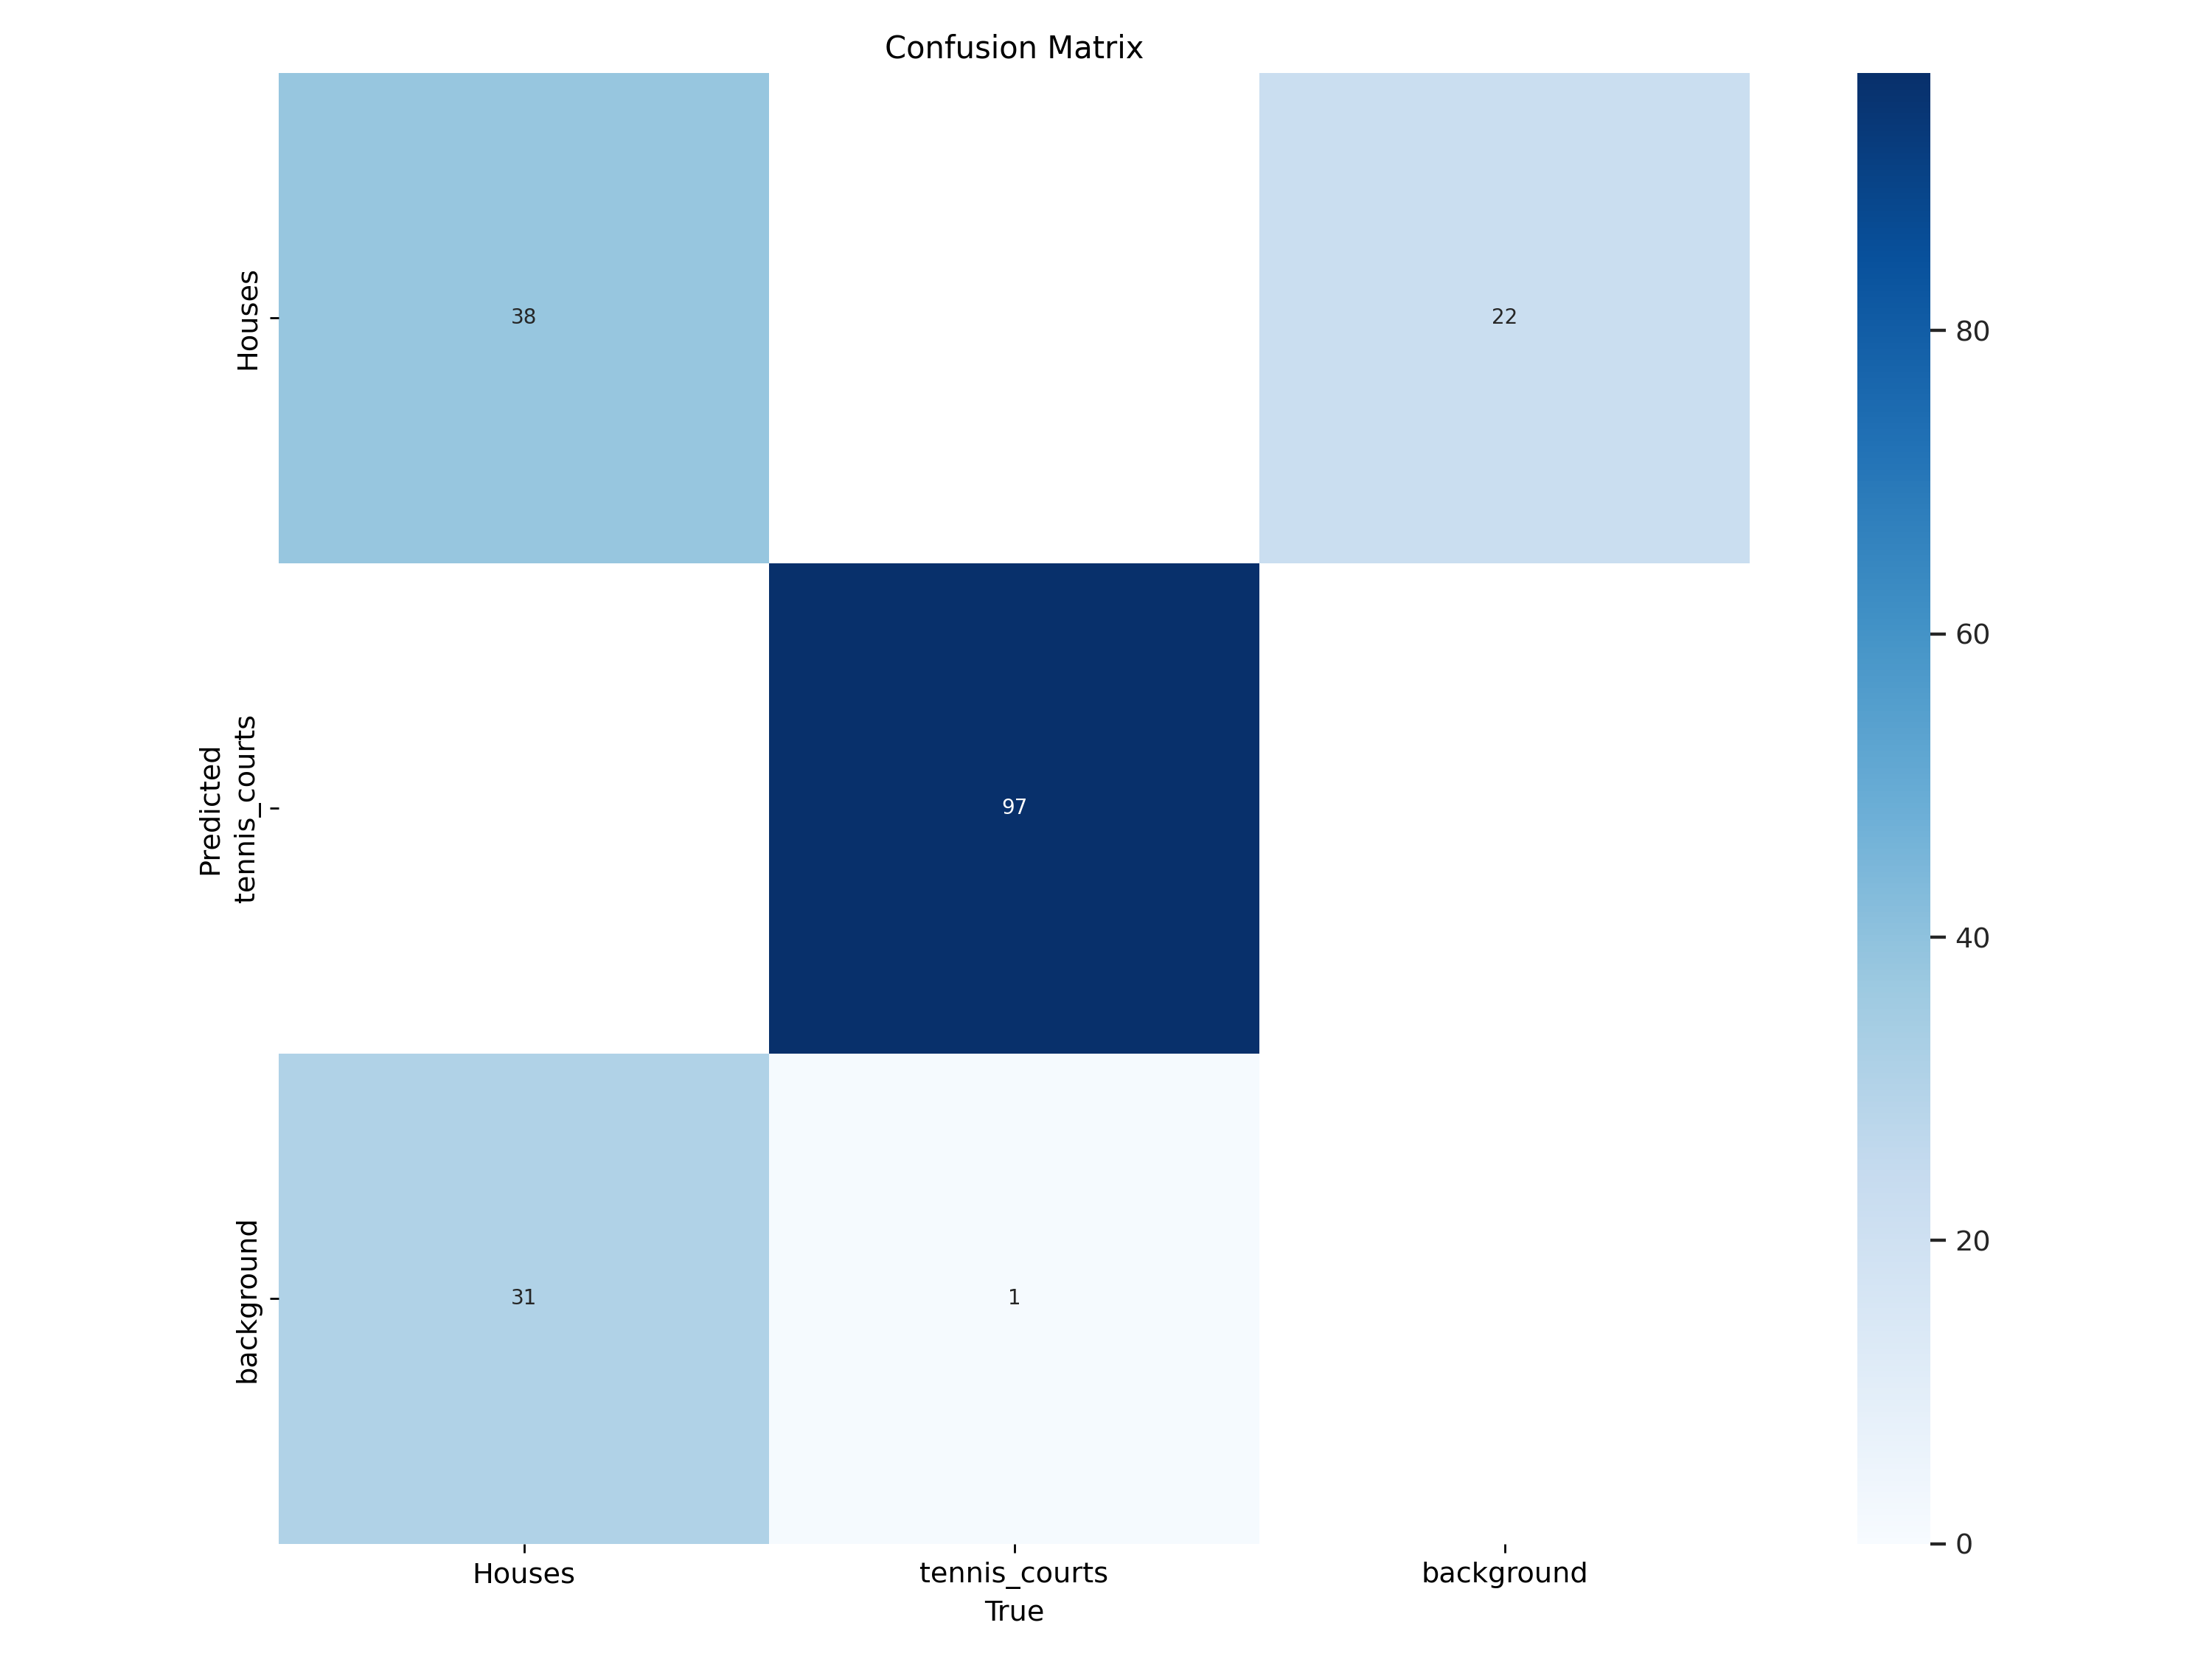

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/obb/train/confusion_matrix.png', width=600)

/content


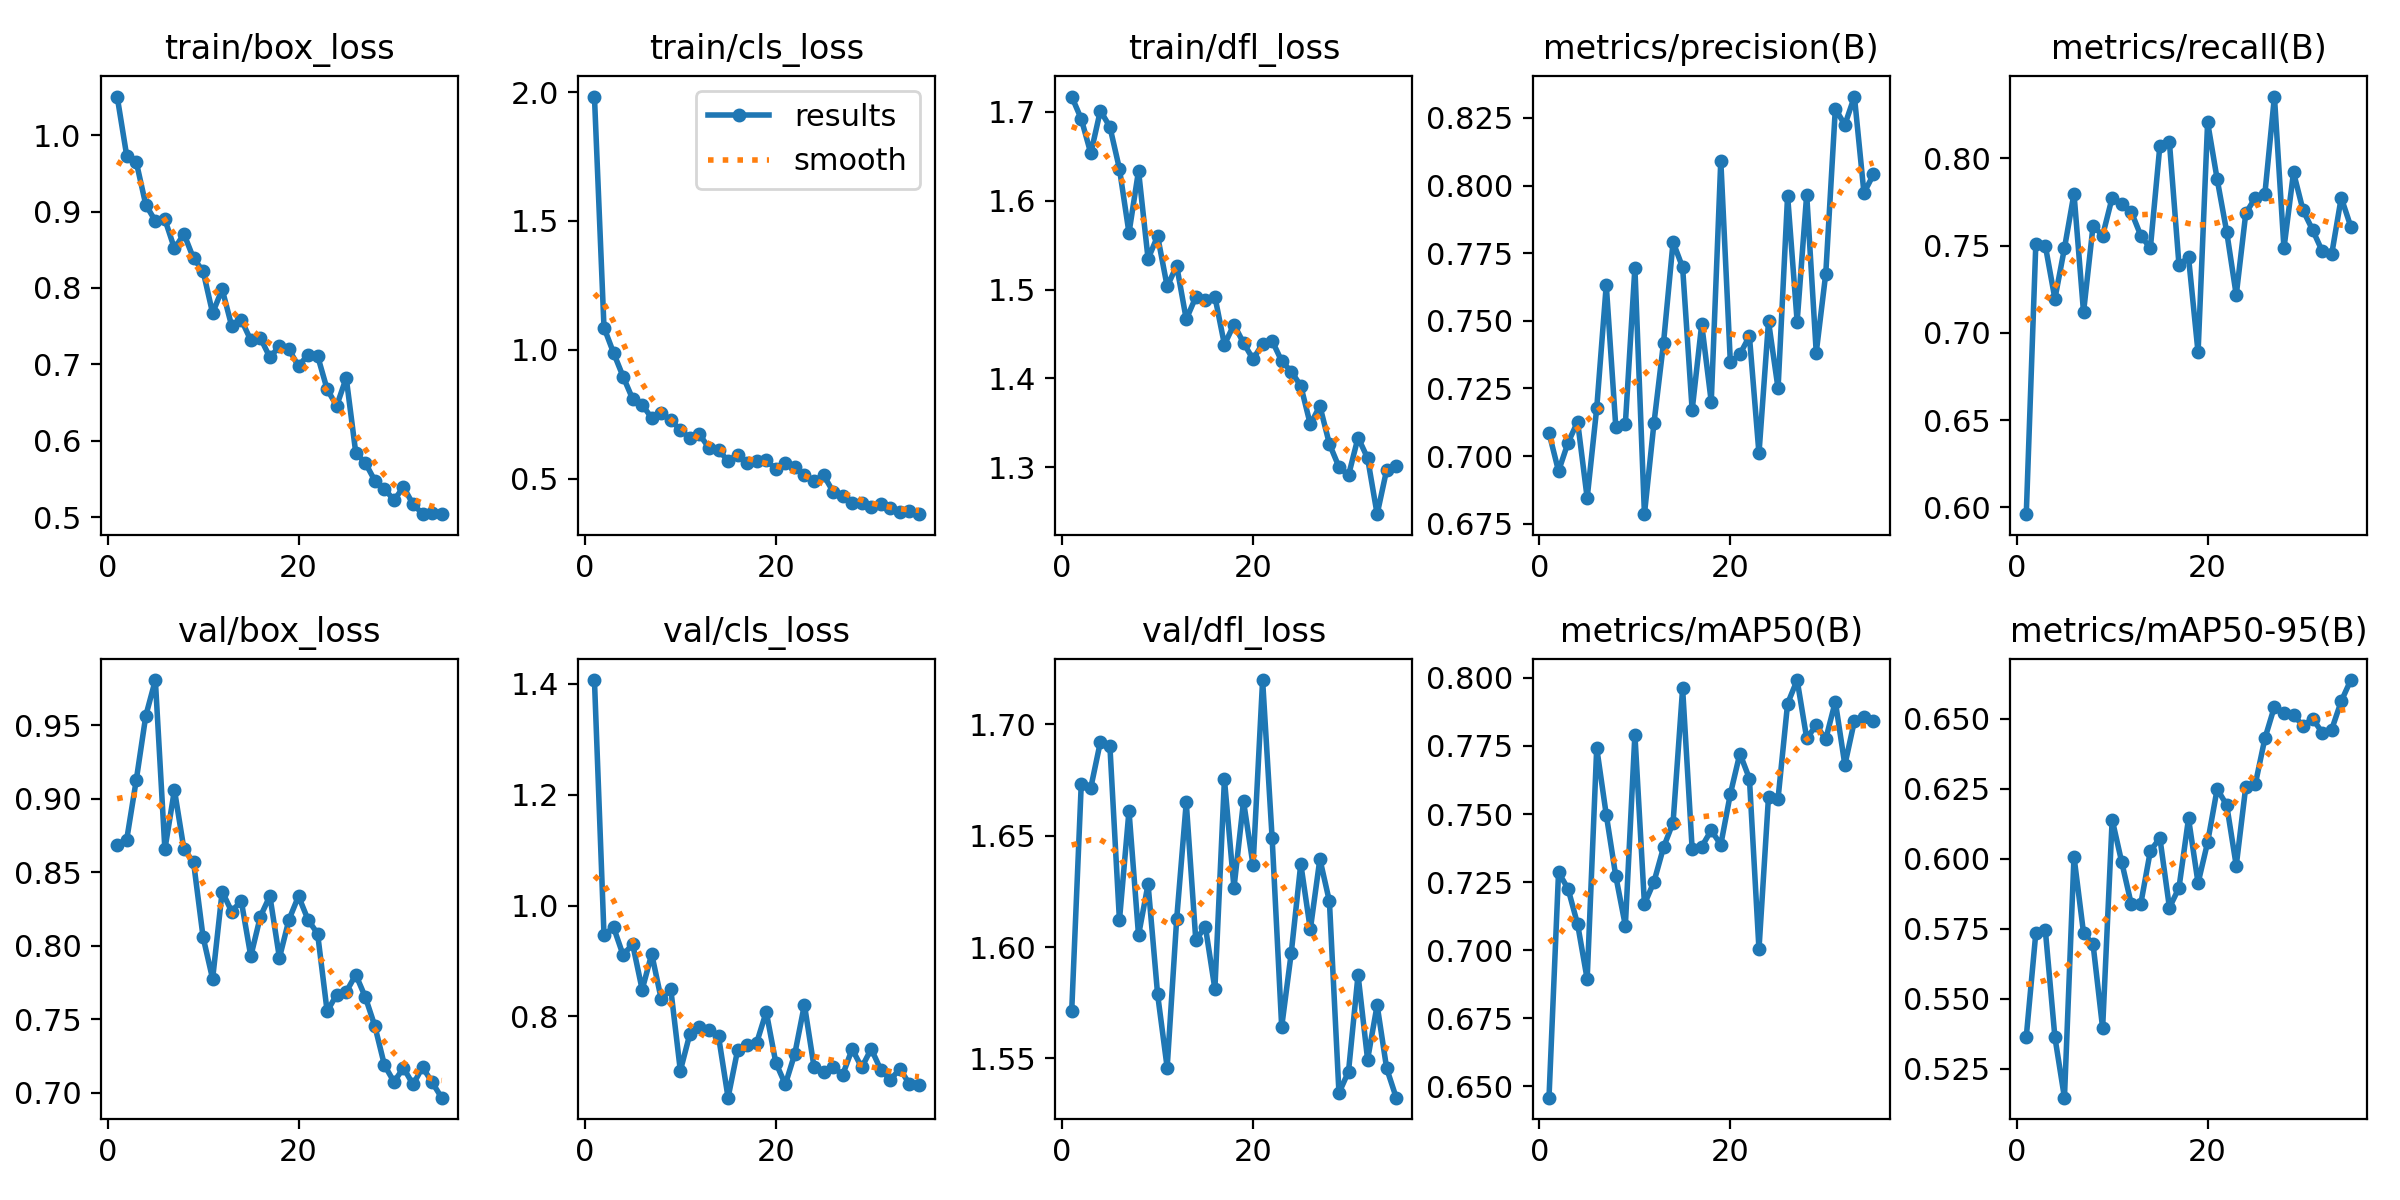

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/obb/train/results.png', width=600)

validating the model

In [ ]:
%cd {HOME}

!yolo task=obb mode=val model={HOME}/runs/obb/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-obb summary (fused): 187 layers, 11,412,345 parameters, 0 gradients, 29.4 GFLOPs
val: Scanning /content/datasets/Grey-Scientific-Labs-1/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100% 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.68it/s]
                   all         23        167      0.804       0.76      0.784      0.662
                Houses         16         69      0.614       0.53      0.576      0.388
         tennis_courts         11         98      0.994       0.99      0.992      0.936
Speed: 0.3ms preprocess, 23.6ms inference, 0.0ms loss, 10.6ms postprocess per image
Results saved to runs/obb/val
💡 Learn more at https://docs.ultralytics.com/modes/val


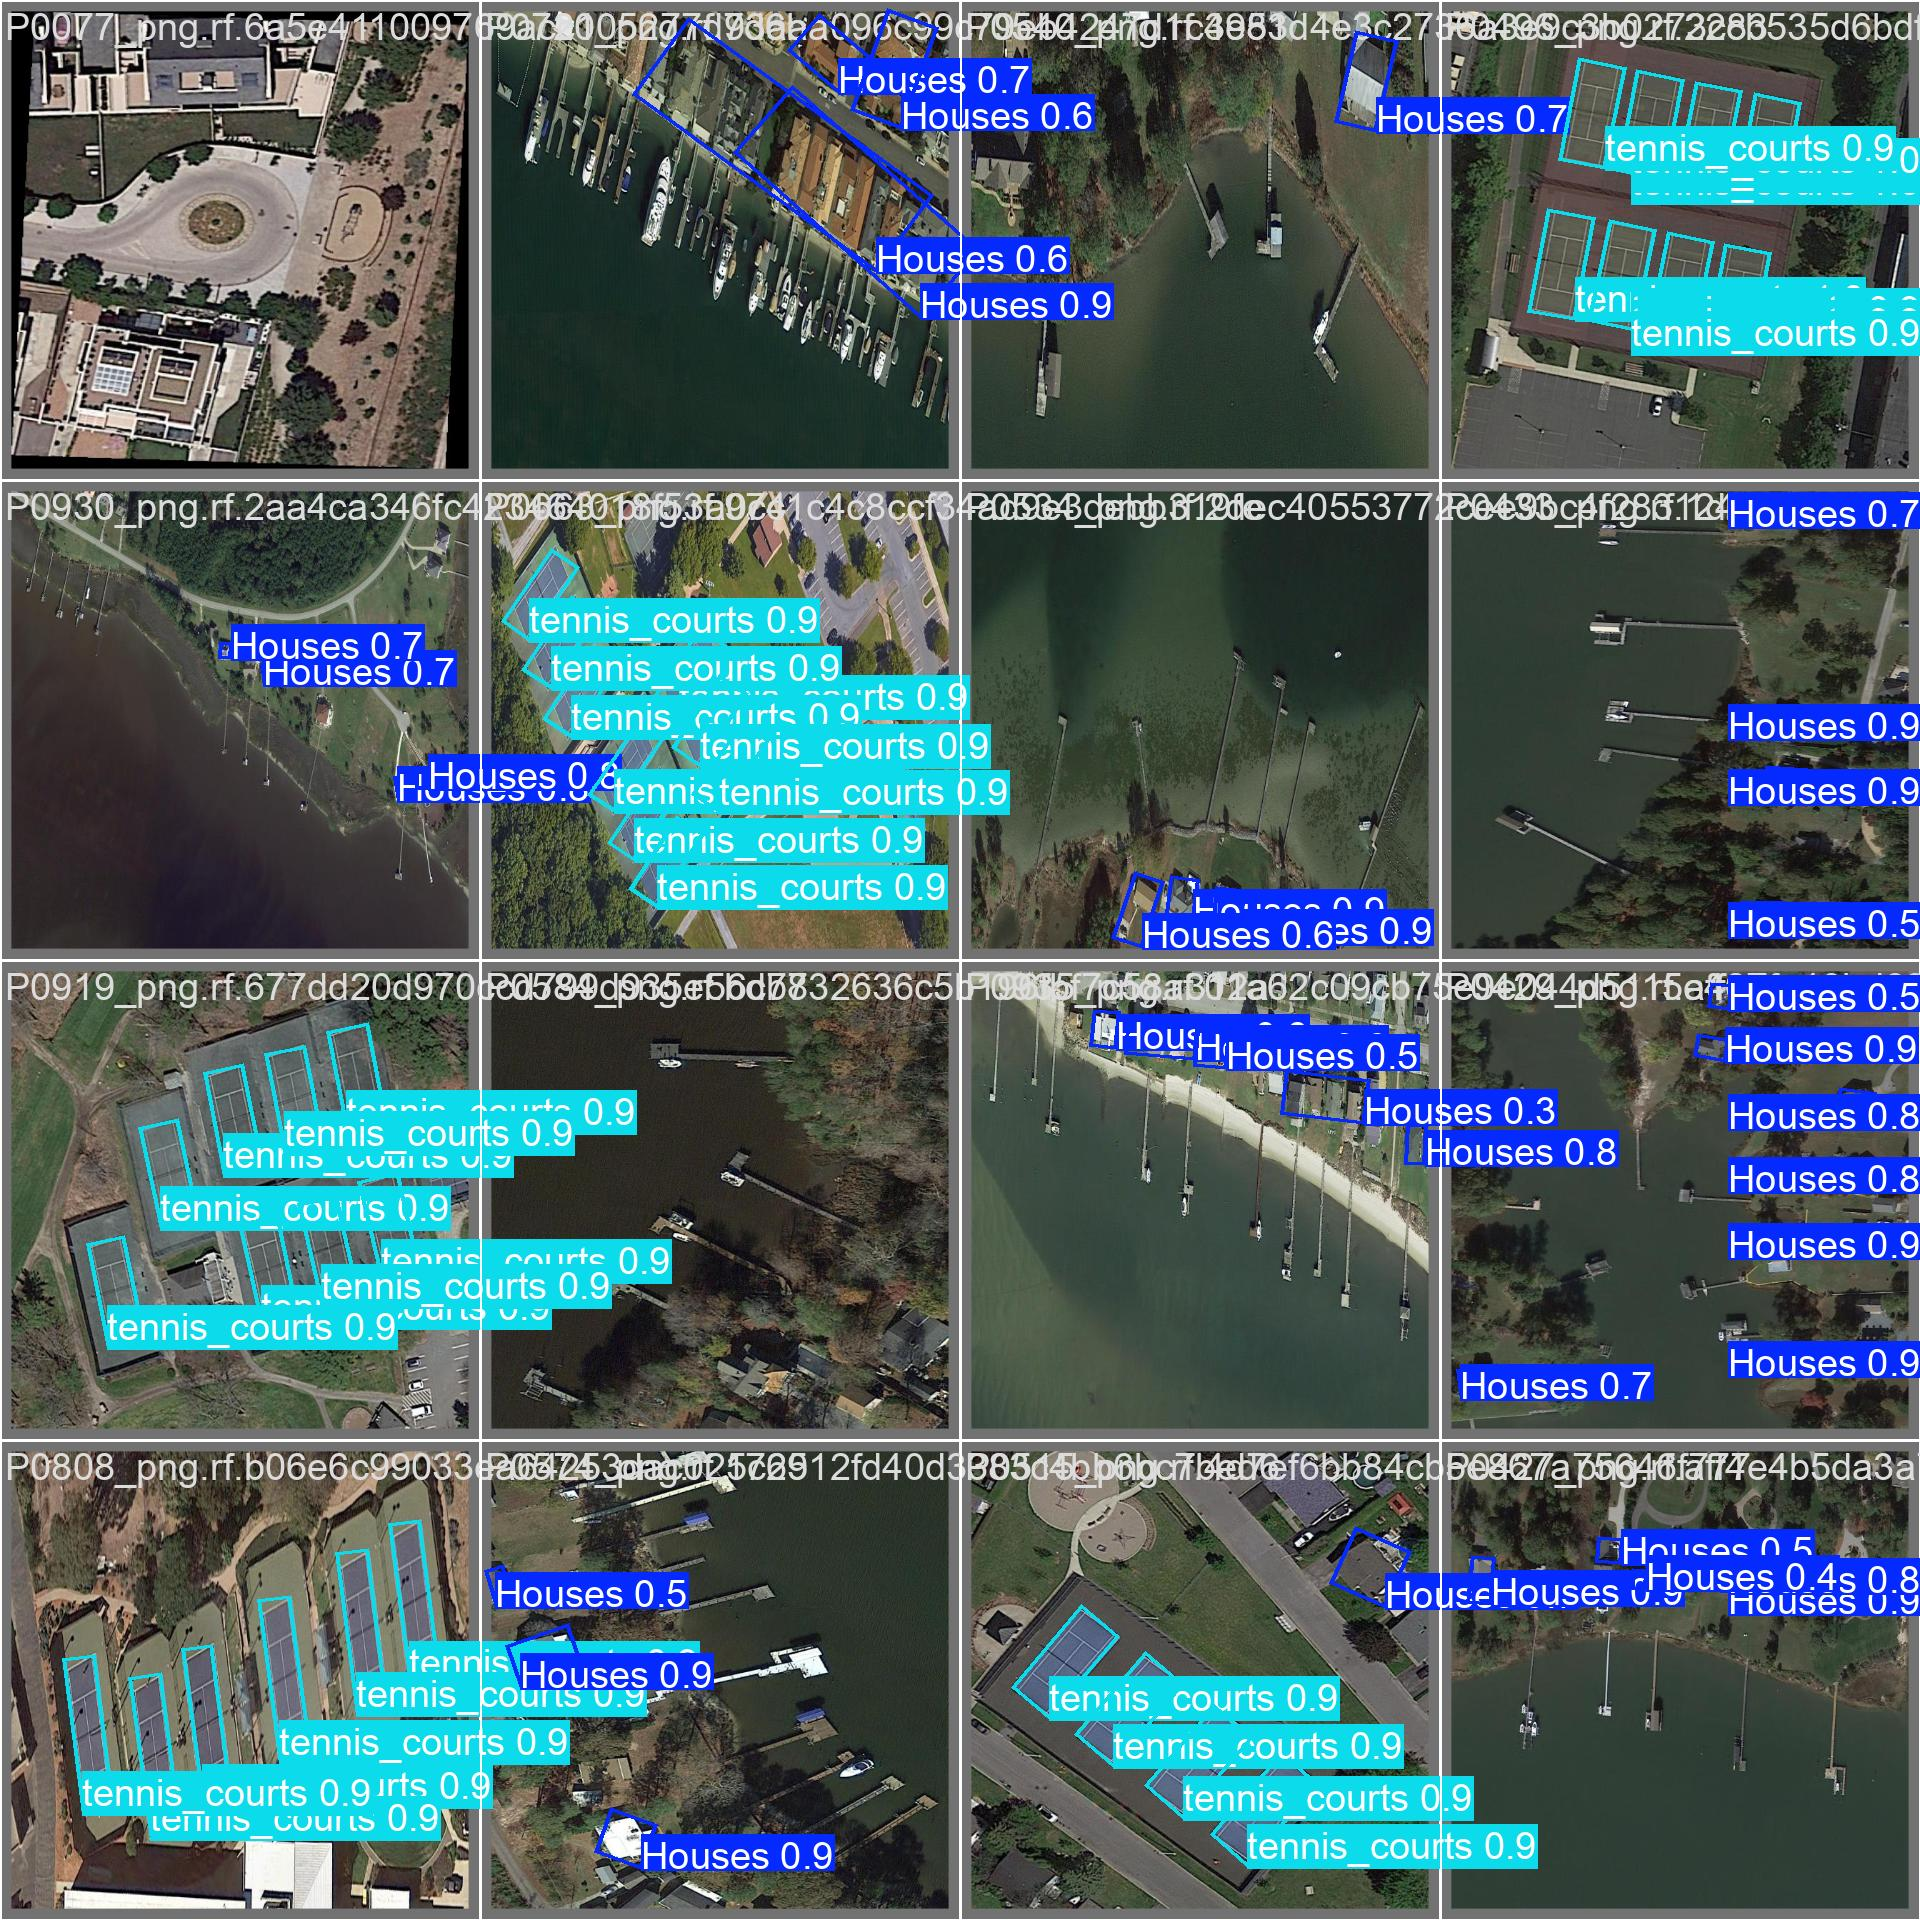

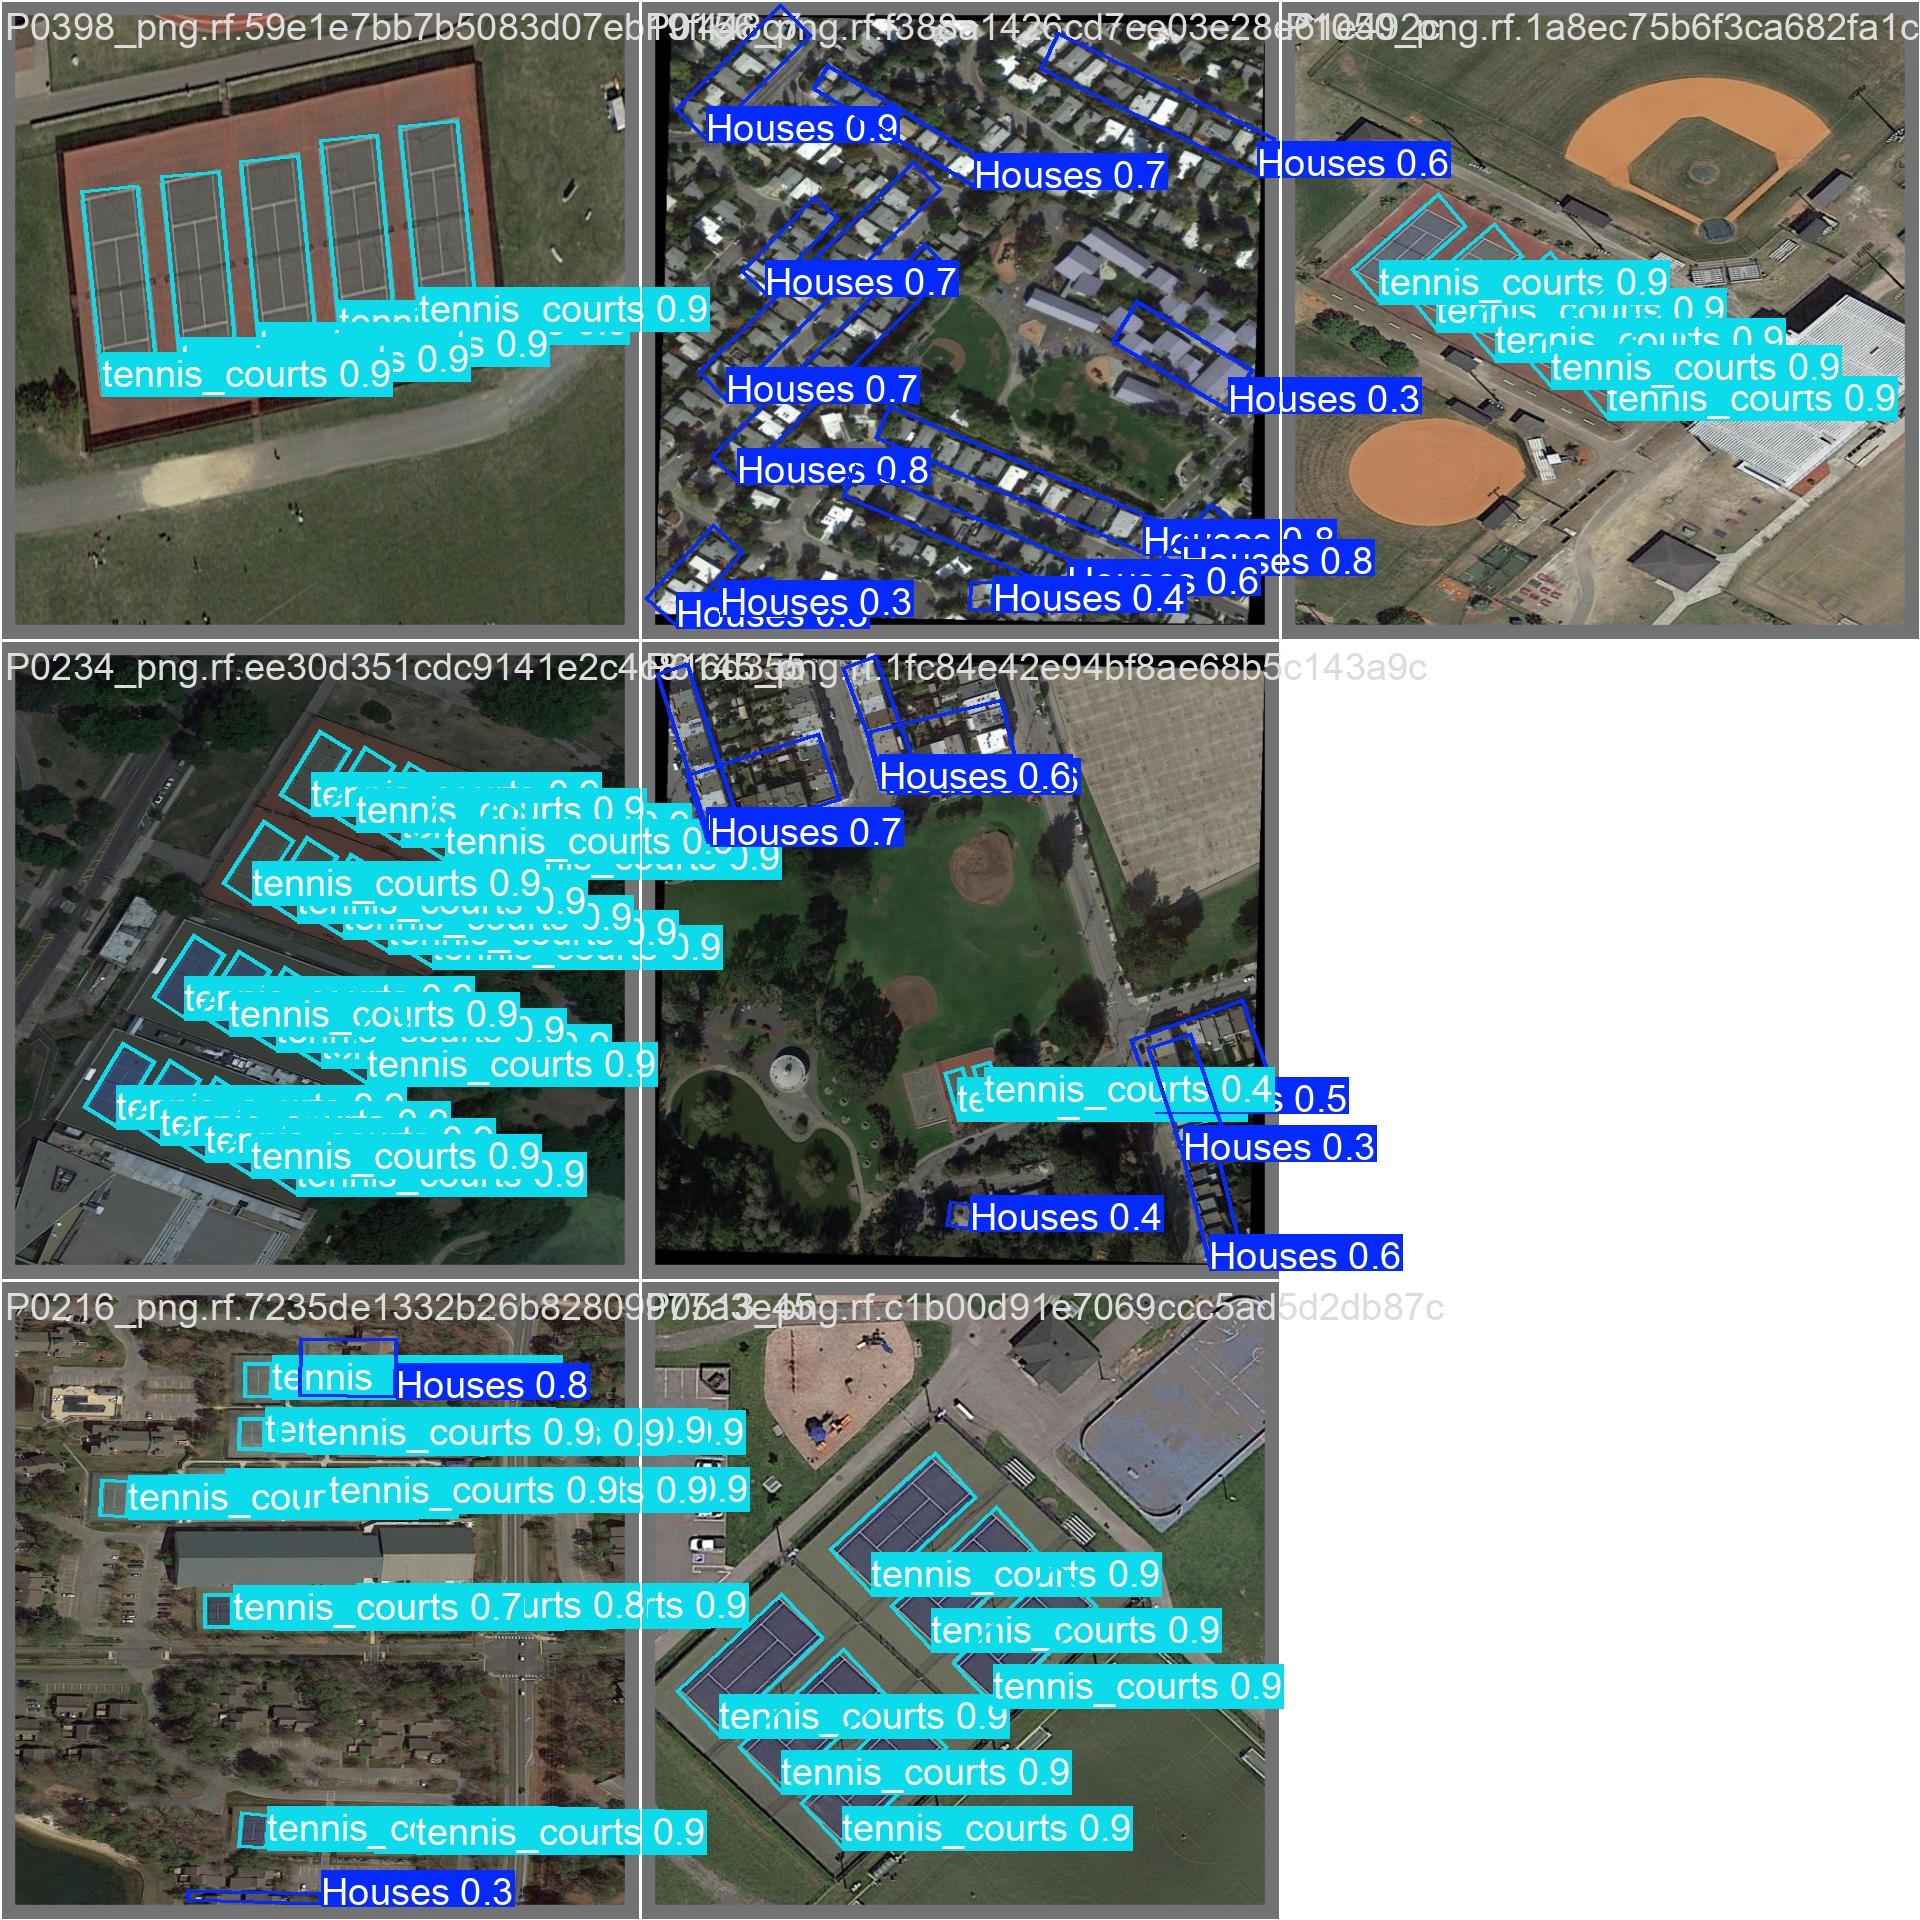

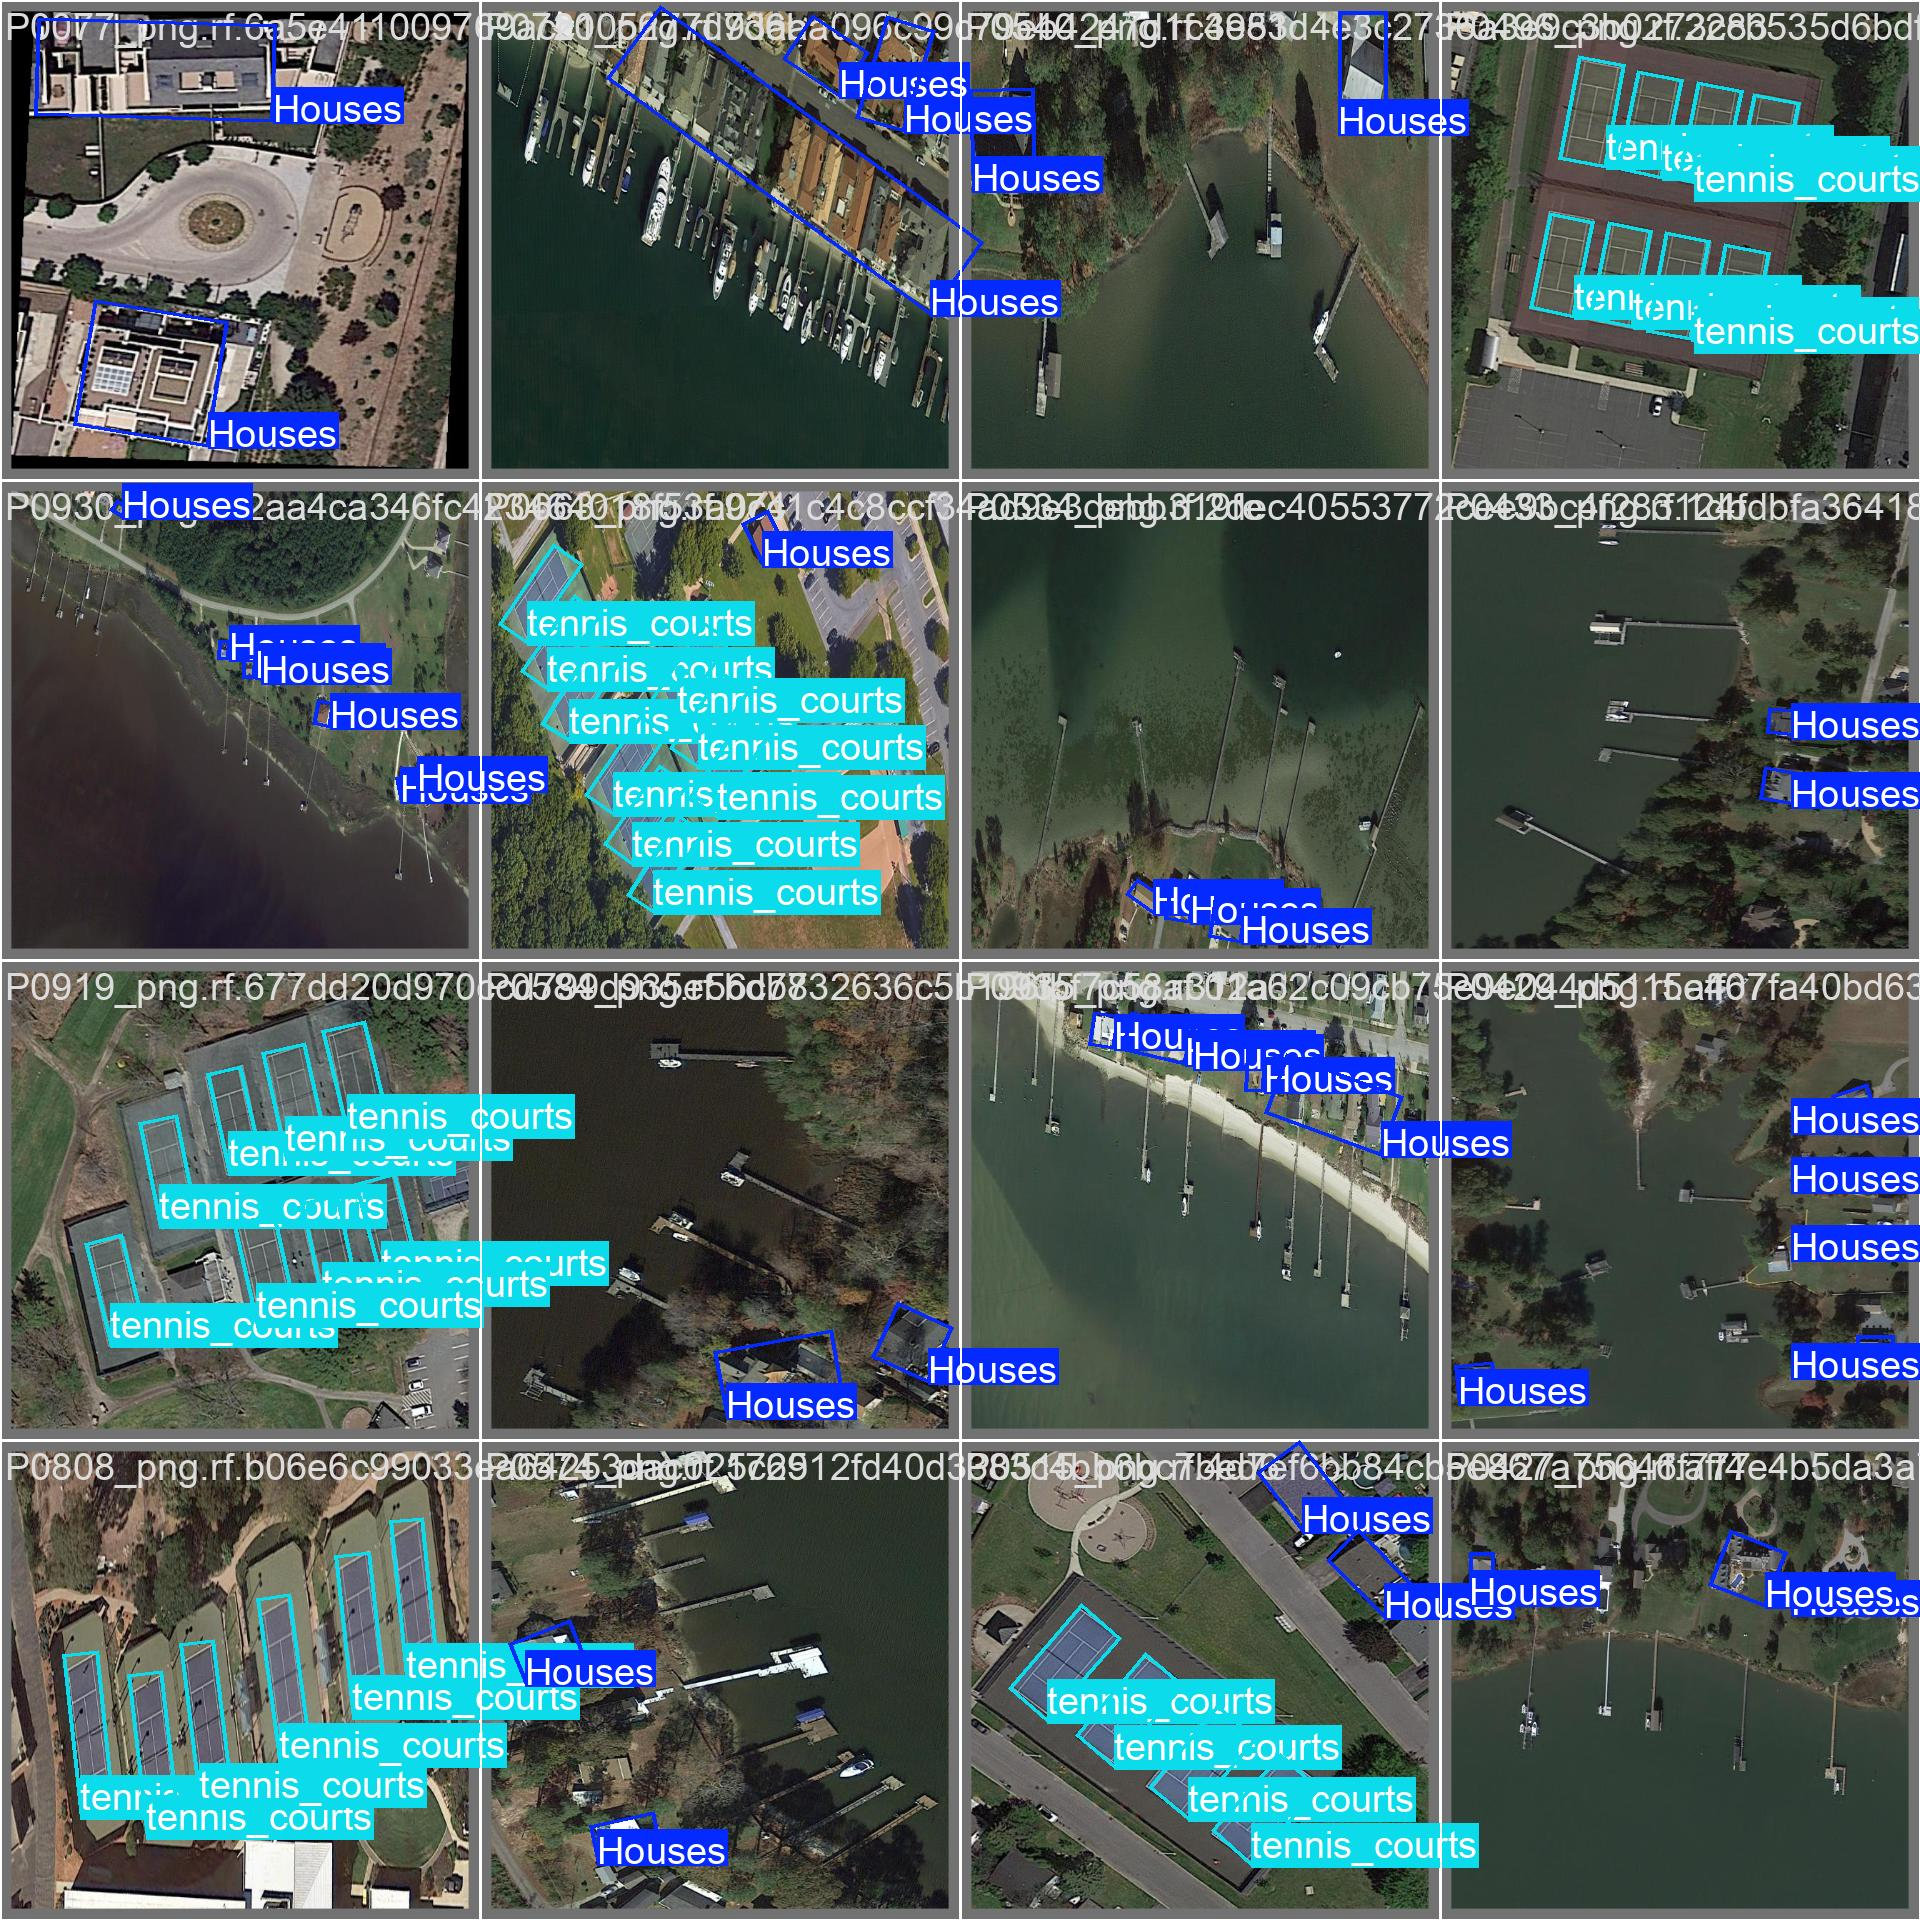

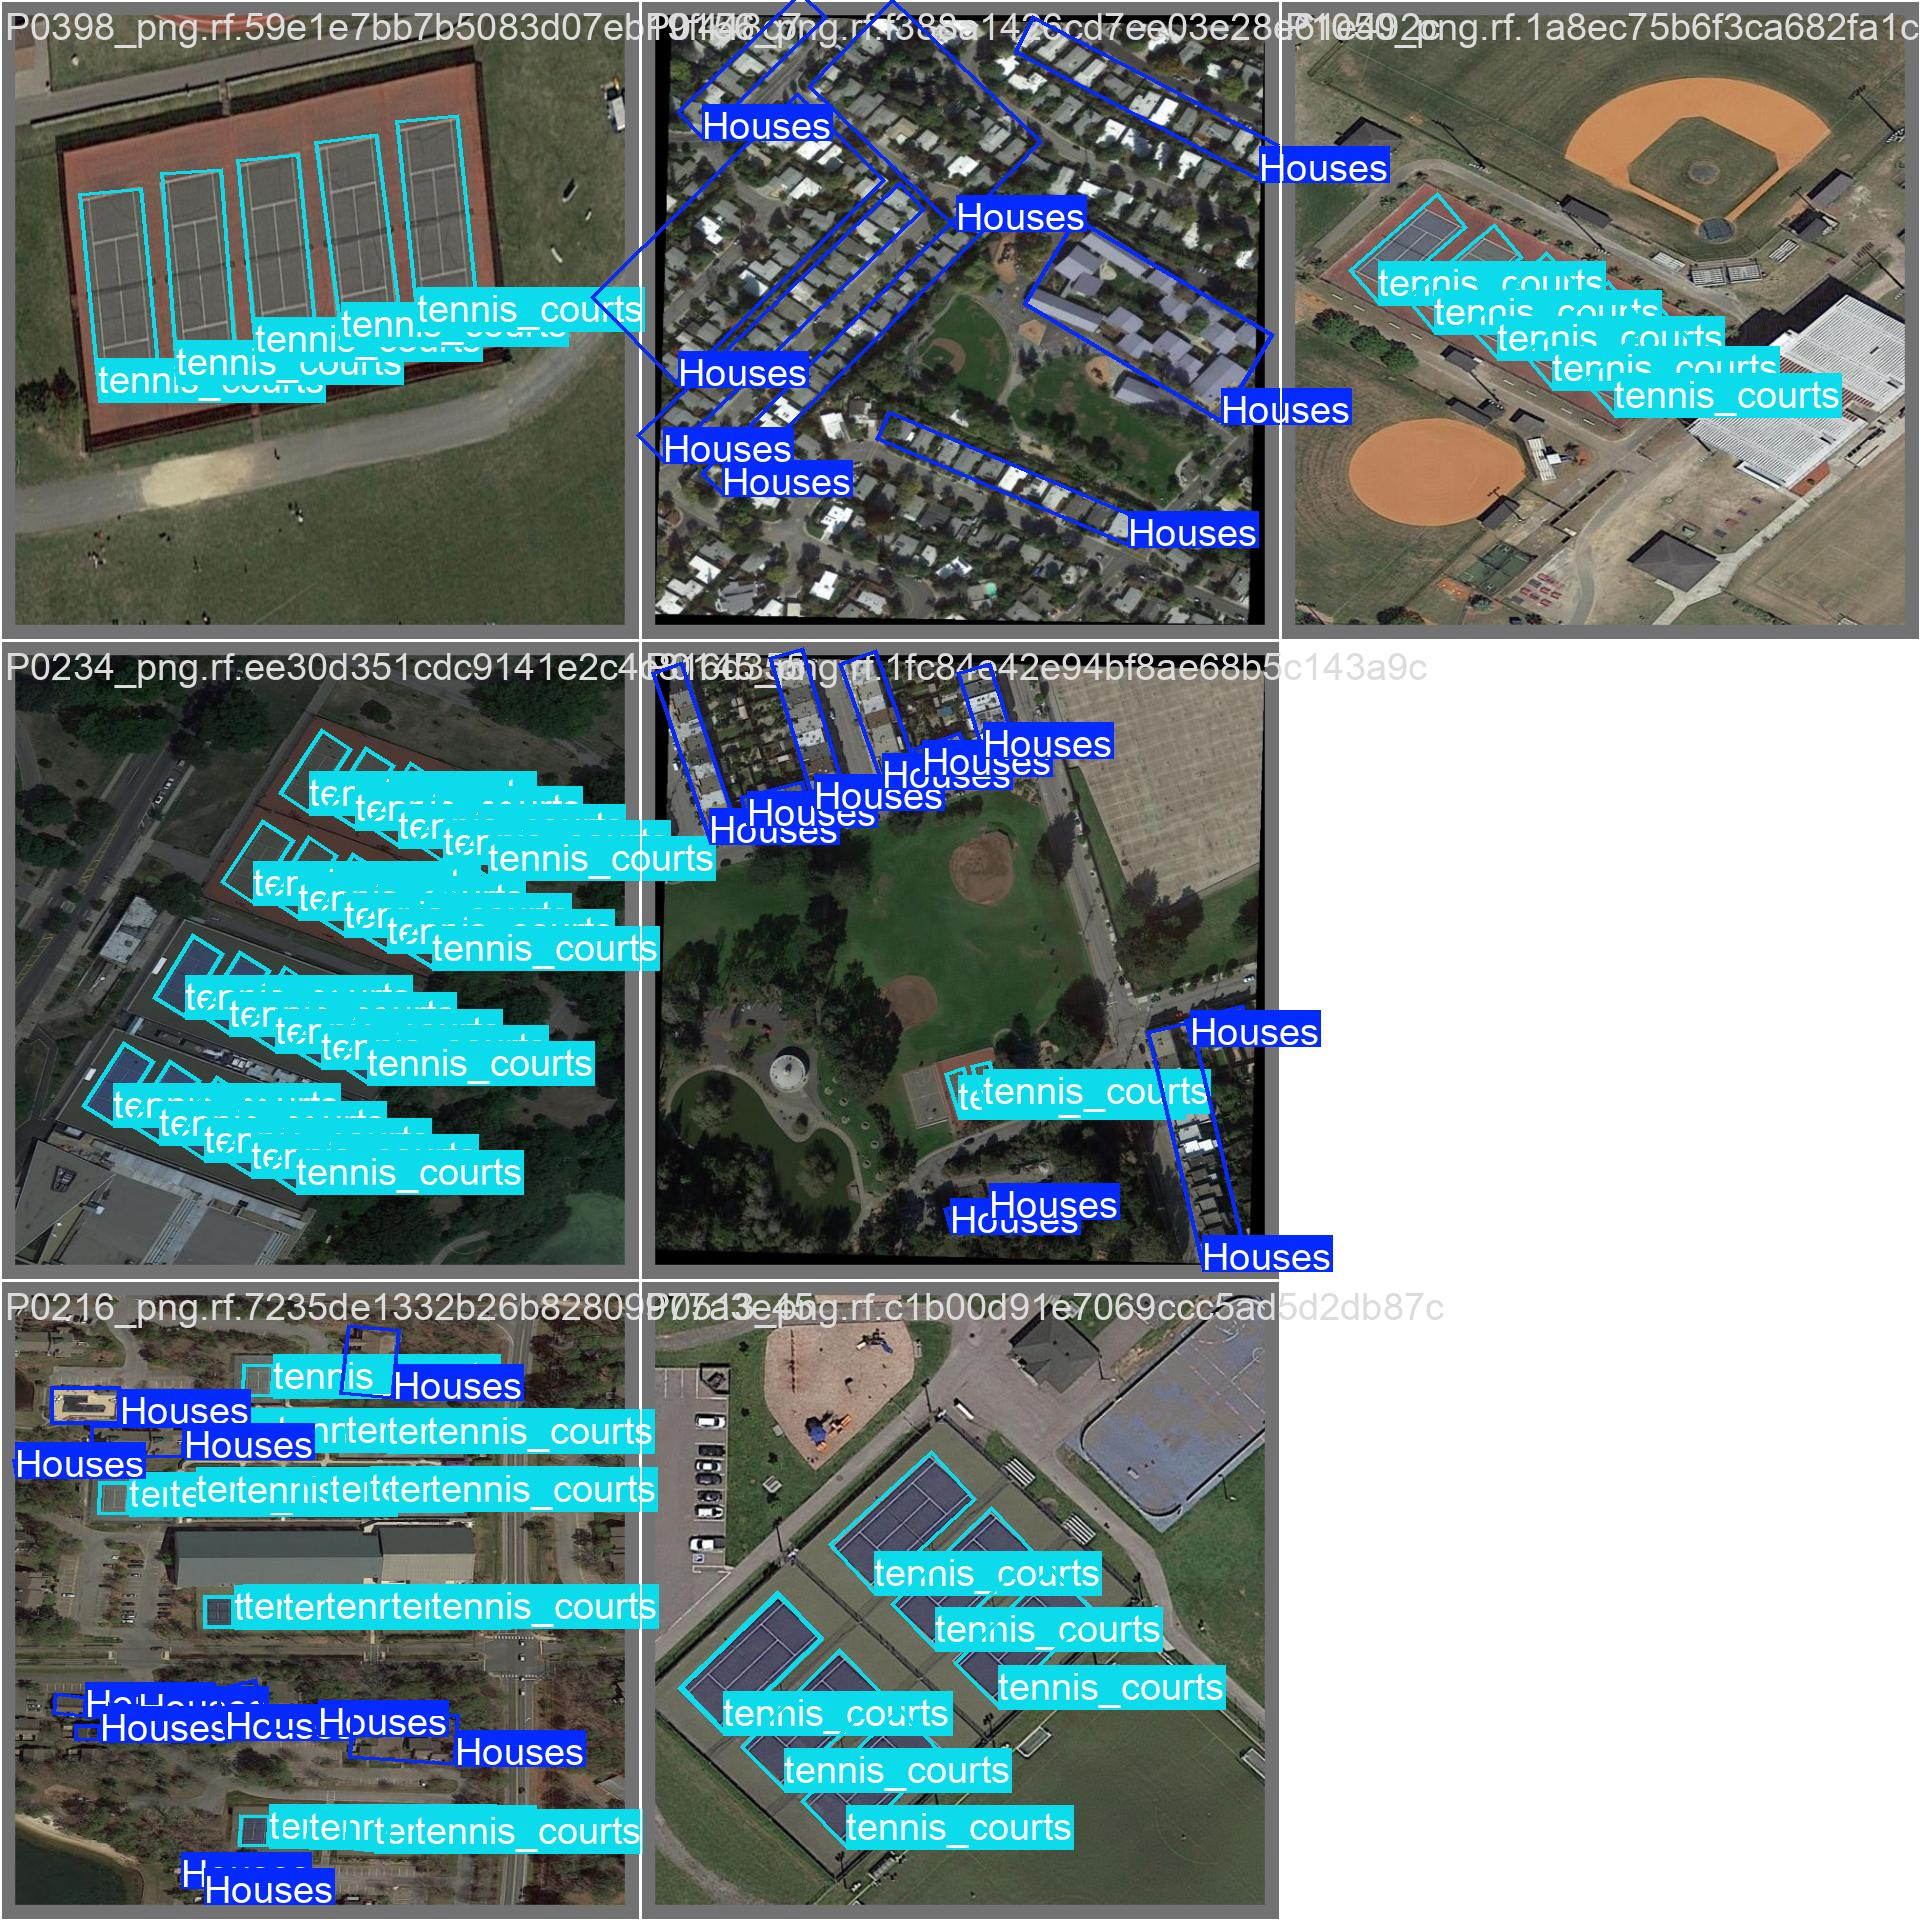

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/obb/val2/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")